In [1]:
# 画像を小さく縮小して余白の推定を試みる
DATA_DIR = 'Z:/knbnk/data/kaisetu'

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread(DATA_DIR+'/01.jpeg', 0)

In [7]:
h, w =  img.shape
tenth_img = cv2.resize(img, (w//10, h//10))
tenth_bw_not = cv2.bitwise_not(tenth_img)
max_value = 255
thresh_under = 55
ret, tenth_bw_not_tozero = cv2.threshold(tenth_bw_not, thresh_under, max_value, cv2.THRESH_TOZERO)

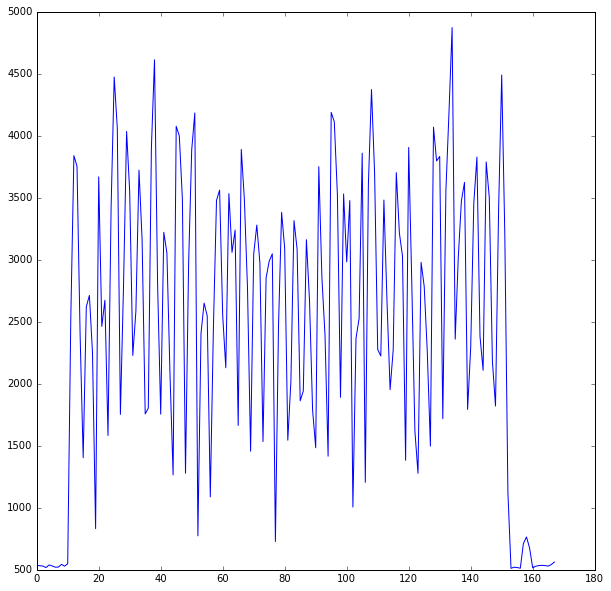

In [11]:
hist = np.sum(tenth_bw_not_tozero, axis=1)
plt.figure(figsize=(10,10))
plt.plot(hist)

In [13]:
print(hist[0:20])

[ 536  533  530  518  539  531  521  522  544  529  549 2531 3840 3755 2399
 1404 2621 2713 2248  832]


In [ ]:
# この結果から、hist[10] までを上川の余白とみなす

In [16]:
# もとの画像のサイズは、
print(img.shape)

(1685, 1164)


In [18]:
# tenth_img のサイズは
print(tenth_img.shape)

(168, 116)


In [ ]:
# つまり、もとの画像の上方の110ピクセルは余白のはず。余裕をとって、100ピクセルは余白と考え、
# 次の画像を表示してみる
cropped_img = img[100:, :]
plt.figure(12,15)
plt.imshow(cropped_img)